## Importng the packages and modules required in the project

In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import scipy
from sklearn import naive_bayes
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.learning_curve import learning_curve
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

## Reading data - csv file using pandas

In [2]:
adv=pd.read_csv('fake_22.csv')

## How the data frame looks like

In [3]:
adv.shape

(8572, 8)

## First 10 values of data frame

In [4]:
adv.head(10)

,author,title,language,site_url,country,domain_rank,spam_score,type
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,english,100percentfedup.com,US,25689,0,bias
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,english,100percentfedup.com,US,25689,0,bias
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,english,100percentfedup.com,US,25689,0,bias
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,100percentfedup.com,US,25689,0.068,bias
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,100percentfedup.com,US,25689,0.865,bias
5,Barracuda Brigade,Hillary Goes Afakeolutely Berserk On Protester...,english,100percentfedup.com,US,25689,0,bias
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,US,25689,0.701,bias
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,english,100percentfedup.com,US,25689,0.188,bias
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,english,100percentfedup.com,US,25689,0.144,bias
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",english,100percentfedup.com,US,25689,0.995,bias


## value counts- Returns object containing counts of unique values.

In [5]:
adv.title.value_counts()

“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                                                        5
Televisión: lo más visto ayer                                                                                                                   4
The Fix Is In: NBC Affiliate Accidentally Posts Election Results A Week Early: Hillary Wins Presidency 42% to Trump’s 40%                       4
Will Barack Obama Delay Or Suspend The Election If Hillary Is Forced Out By The New FBI Email Investigation?                                    4
The Dark Agenda Behind Globalism And Open Borders                                                                                               4
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                                              4
Las imágenes libres de derechos más destacadas de la semana                                                                 

In [6]:
adv.author.value_counts()

admin                                          246
Alex Ansary                                    100
Pakalert                                       100
noreply@blogger.com (Alexander Light)           99
Dave Hodges                                     99
BareNakedIslam                                  99
IWB                                             98
The European Union Times                        96
Anonymous                                       94
The Doc                                         92
Henry Wolff                                     86
Kaitlyn Stegall                                 86
noreply@blogger.com (Der Postillon)             83
EdJenner                                        82
Activist Post                                   82
David Stockman                                  81
Iron Sheik                                      80
Gillian                                         80
Heather Callaghan                               78
Geoffrey Grider                

In [7]:
adv.language.value_counts()

english                          8122
russian                           156
spanish                           132
german                            102
french                             24
arabic                             12
portuguese                          6
ignore                              3
dutch                               2
greek                               2
US                                  1
finnish                             1
2016-10-31T18:18:47.521+02:00       1
italian                             1
turkish                             1
Name: language, dtype: int64

In [8]:
adv.country.value_counts()

US       6986
RU        356
DE        214
FR        200
GB        175
EU        112
TV        101
ES        100
NL         44
ME         34
IN         20
CO         17
CA         14
LI          5
EE          4
IR          4
SE          1
0           1
IO          1
68691       1
SG          1
AU          1
Name: country, dtype: int64

In [9]:
adv.site_url.value_counts()

prisonplanet.com                              100
disclose.tv                                   100
antiwar.com                                   100
pravdareport.com                              100
silverdoctors.com                             100
conservativetribune.com                       100
beforeitsnews.com                             100
ifyouonlynews.com                             100
godlikeproductions.com                        100
dailystormer.com                              100
thecommonsenseshow.com                        100
frontpagemag.com                              100
presstv.ir                                    100
barenakedislam.com                            100
madworldnews.com                              100
guardianlv.com                                100
sputniknews.com                               100
elmundotoday.com                              100
davidstockmanscontracorner.com                100
blacklistednews.com                           100


In [10]:
adv.domain_rank.value_counts()

18495                                                                                             100
25709                                                                                             100
12387                                                                                             100
62759                                                                                             100
36674                                                                                             100
12993                                                                                             100
67400                                                                                             100
486                                                                                               100
2774                                                                                              100
10414                                                                             

In [11]:
adv.spam_score.value_counts()

0        7711
0.001      58
0.002      26
0.007      25
0.2        22
0.003      17
0.009      16
0.006      15
1          15
0.005      11
0.004      11
0.022      11
0.094       8
0.015       8
0.008       8
0.011       8
0.01        7
0.012       7
0.966       7
0.509       6
0.017       6
0.028       6
0.045       5
0.04        5
0.032       5
0.021       5
0.033       5
0.019       5
0.025       5
0.029       5
         ... 
0.473       1
0.584       1
0.036       1
0.151       1
0.863       1
0.377       1
0.057       1
0.131       1
0.565       1
0.928       1
0.538       1
0.334       1
0.958       1
0.956       1
0.322       1
0.35        1
0.677       1
0.166       1
0.047       1
0.22        1
0.211       1
0.883       1
0.254       1
0.319       1
0.143       1
0.114       1
0.765       1
0.992       1
0.18        1
0.277       1
Name: spam_score, dtype: int64

In [12]:
adv.type.value_counts()

fake          7429
conspiracy     430
satire         267
bias           239
hate           199
Name: type, dtype: int64

## Aggregate statistics

In [149]:
adv.describe()

,length,type_num
count,4070.000000,4070.000000
mean,68.651106,0.357248
std,26.567518,0.981841
min,1.000000,0.000000
25%,51.000000,0.000000
50%,68.000000,0.000000
75%,83.000000,0.000000
max,276.000000,4.000000


In [150]:
adv.groupby('type').describe()

length  type_num
type                                   
bias       count   190.000000     190.0
           mean     78.231579       3.0
           std      24.594899       0.0
           min      22.000000       3.0
           25%      67.000000       3.0
           50%      78.000000       3.0
           75%      84.750000       3.0
           max     223.000000       3.0
conspiracy count   260.000000     260.0
           mean     66.053846       1.0
           std      23.873480       0.0
           min      15.000000       1.0
           25%      50.000000       1.0
           50%      64.000000       1.0
           75%      78.000000       1.0
           max     206.000000       1.0
fake       count  3461.000000    3461.0
           mean     69.049119       0.0
           std      26.794269       0.0
           min       1.000000       0.0
           25%      51.000000       0.0
           50%      69.000000       0.0
           75%      84.000000       0.0
           max     276.000000       0.0
hate       count   153.000000     153.0
           mean     52.816993       4.0
           std      20.873818       0.0
           min      15.000000       4.0
           25%      37.000000       4.0
           50%      52.000000       4.0
           75%      65.000000       4.0
           max     107.000000       4.0
satire     count     6.000000       6.0
           mean     52.000000       2.0
           std       3.162278       0.0
           min      48.000000       2.0
           25%      50.250000       2.0
           50%      51.500000       2.0
           75%      53.500000       2.0
           max      57.000000       2.0

In [13]:
new_data=adv[['author','title','language','country','site_url','domain_rank','spam_score','type']]

In [14]:
new_data

,author,title,language,country,site_url,domain_rank,spam_score,type
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,english,US,100percentfedup.com,25689,0,bias
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,english,US,100percentfedup.com,25689,0,bias
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,english,US,100percentfedup.com,25689,0,bias
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,US,100percentfedup.com,25689,0.068,bias
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,US,100percentfedup.com,25689,0.865,bias
5,Barracuda Brigade,Hillary Goes Afakeolutely Berserk On Protester...,english,US,100percentfedup.com,25689,0,bias
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,US,100percentfedup.com,25689,0.701,bias
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,english,US,100percentfedup.com,25689,0.188,bias
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,english,US,100percentfedup.com,25689,0.144,bias
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",english,US,100percentfedup.com,25689,0.995,bias


## Removing Null values- Cleaning the data

In [15]:
adv[adv.author.notnull()]
adv[adv.title.notnull()]
adv[adv.language.notnull()]
adv[adv.site_url.notnull()]
adv[adv.country.notnull()]
adv[adv.domain_rank.notnull()]
adv[adv.spam_score.notnull()]
adv[adv.type.notnull()]

,author,title,language,site_url,country,domain_rank,spam_score,type
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,english,100percentfedup.com,US,25689,0,bias
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,english,100percentfedup.com,US,25689,0,bias
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,english,100percentfedup.com,US,25689,0,bias
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,100percentfedup.com,US,25689,0.068,bias
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,100percentfedup.com,US,25689,0.865,bias
5,Barracuda Brigade,Hillary Goes Afakeolutely Berserk On Protester...,english,100percentfedup.com,US,25689,0,bias
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,US,25689,0.701,bias
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,english,100percentfedup.com,US,25689,0.188,bias
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,english,100percentfedup.com,US,25689,0.144,bias
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",english,100percentfedup.com,US,25689,0.995,bias


In [16]:
adv=adv[pd.notnull(adv['author'])]
adv=adv[pd.notnull(adv['title'])]
adv=adv[pd.notnull(adv['language'])]
adv=adv[pd.notnull(adv['country'])]
adv=adv[pd.notnull(adv['site_url'])]
adv=adv[pd.notnull(adv['domain_rank'])]
adv=adv[pd.notnull(adv['spam_score'])]
adv=adv[pd.notnull(adv['type'])]

In [17]:
adv.isnull()

,author,title,language,site_url,country,domain_rank,spam_score,type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [18]:
len(adv)

4070

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

## Length Calculation

In [21]:
adv['length']=adv['title'].map(lambda text: len(text))
adv.head()

,author,title,language,site_url,country,domain_rank,spam_score,type,length
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,english,100percentfedup.com,US,25689,0,bias,53
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,english,100percentfedup.com,US,25689,0,bias,59
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,english,100percentfedup.com,US,25689,0,bias,68
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,100percentfedup.com,US,25689,0.068,bias,125
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,100percentfedup.com,US,25689,0.865,bias,101


## Plotting the graph according 

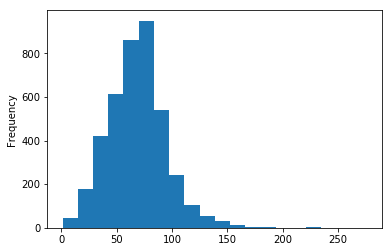

In [22]:
adv.length.plot(bins=20, kind='hist')

In [23]:
adv.length.describe()

count    4070.000000
mean       68.651106
std        26.567518
min         1.000000
25%        51.000000
50%        68.000000
75%        83.000000
max       276.000000
Name: length, dtype: float64

## Length comaprisons for different types

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB9637978>


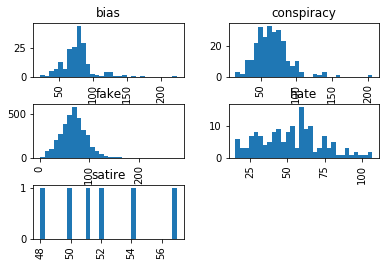

In [24]:
print(adv.hist(column='length', by='type', bins=30))

## Processing features

In [25]:
def tokenize(title):
    title2 = 'title -' + str(title)  # convert bytes into proper unicode
    return TextBlob(title).words

In [26]:
adv.title.head().apply(tokenize)

0    [Muslims, BUSTED, They, Stole, Millions, In, G...
1    [Re, Why, Did, Attorney, General, Loretta, Lyn...
2    [BREAKING, Weiner, Cooperating, With, FBI, On,...
3    [PIN, DROP, SPEECH, BY, FATHER, OF, DAUGHTER, ...
4    [FANTASTIC, TRUMP, 'S, 7, POINT, PLAN, To, Ref...
Name: title, dtype: object

In [27]:
def lemmatize(title):
    title2 = 'title -' + str(title).lower()
    words = TextBlob(title).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

adv.title.head().apply(lemmatize)

0    [Muslims, BUSTED, They, Stole, Millions, In, G...
1    [Re, Why, Did, Attorney, General, Loretta, Lyn...
2    [BREAKING, Weiner, Cooperating, With, FBI, On,...
3    [PIN, DROP, SPEECH, BY, FATHER, OF, DAUGHTER, ...
4    [FANTASTIC, TRUMP, 'S, 7, POINT, PLAN, To, Ref...
Name: title, dtype: object

In [28]:
TextBlob("BREAKING: Weiner Cooperating With FBI On Hilla").tags

[('BREAKING', 'NN'),
 ('Weiner', 'NNP'),
 ('Cooperating', 'VBG'),
 ('With', 'IN'),
 ('FBI', 'NNP'),
 ('On', 'IN'),
 ('Hilla', 'NNP')]

## Data to Vectors- fitting and transforming using Count Vectorizer 

In [29]:
bow_transformer = CountVectorizer(analyzer=lemmatize).fit(adv['title'])
len(bow_transformer.vocabulary_)

12080

In [30]:
title4=adv['title'][20]

In [31]:
title4

'MARK CUBAN: "In The Event Donald Wins, I Have No Doubt The Market Tanks"…So Here\'s What Really Happened [VIDEO] » 100percentfedUp.com'

In [32]:
bow4 = bow_transformer.transform([title4])
bow4

<1x12080 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [33]:
bow_transformer.get_feature_names()[456]

'Acquittal'

## SParsity- sparse matrix

In [34]:
title_bow = bow_transformer.transform(adv['title'])

'sparsity: %.2f%%' % (100.0 * title_bow.nnz / (title_bow.shape[0] * title_bow.shape[1]))

'sparsity: 0.09%'

In [35]:
'sparse matrix shape:', title_bow.shape

('sparse matrix shape:', (4070, 12080))

In [36]:
'number of non-zeros:', title_bow.nnz

('number of non-zeros:', 43816)

## Data to Vectors- fitting and transforming TFIDF- term frequency- inverse doc frequency and getting sparse matrix

In [37]:
tfidf_transformer = TfidfTransformer().fit(title_bow)
tfidf4 = tfidf_transformer.transform(bow4)
tfidf4

<1x12080 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [38]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

7.9253495873830886

In [39]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.6184967679430322

In [40]:
title_tfidf = tfidf_transformer.transform(title_bow)
title_tfidf.shape

(4070, 12080)

## Applying Multinomial on the whole training set and predicting accuracy

In [41]:
%time spam_detector = MultinomialNB().fit(title_tfidf, adv['type'])

Wall time: 20.1 ms


In [42]:
spam_detector=MultinomialNB().fit(title_tfidf, adv['type'])

In [43]:
spam_detector

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
'predicted:', spam_detector.predict(tfidf4)[0]

('predicted:', 'fake')

In [45]:
'expected:', adv.type[8]

('expected:', 'bias')

In [46]:
'expected:', adv.type[500]

('expected:', 'fake')

In [47]:
all_predictions = spam_detector.predict(title_tfidf)
all_predictions

array(['fake', 'fake', 'fake', ..., 'fake', 'fake', 'fake'], 
      dtype='<U10')

In [48]:
'accuracy', accuracy_score(adv['type'], all_predictions)

('accuracy', 0.85036855036855041)

In [49]:
print('confusion matrix\n', confusion_matrix(adv['type'], all_predictions))


confusion matrix
 [[   0    0  190    0    0]
 [   0    0  260    0    0]
 [   0    0 3461    0    0]
 [   0    0  153    0    0]
 [   0    0    6    0    0]]


In [50]:
'(row=expected, col=predicted)'

'(row=expected, col=predicted)'

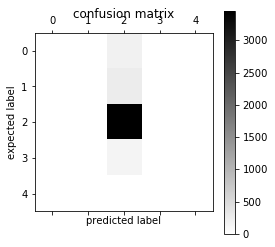

In [51]:
plt.matshow(confusion_matrix(adv['type'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [52]:
print (classification_report(adv['type'], all_predictions))

             precision    recall  f1-score   support

       bias       0.00      0.00      0.00       190
 conspiracy       0.00      0.00      0.00       260
       fake       0.85      1.00      0.92      3461
       hate       0.00      0.00      0.00       153
     satire       0.00      0.00      0.00         6

avg / total       0.72      0.85      0.78      4070



C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Calculating how much data we are training and testing

In [53]:
msg_train, msg_test, label_train, label_test = train_test_split(adv['title'], adv['type'], test_size=0.2)

len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

(3256, 814, 4070)

## PIPELINE- to combine techniques


In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [55]:
import _pickle as cPickle

In [56]:
scores = cross_val_score(pipeline,  # steps to convert raw emails into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


## Cross validation scores

In [57]:
scores

array([ 0.84146341,  0.83841463,  0.84097859,  0.83792049,  0.8440367 ,
        0.85185185,  0.85185185,  0.84567901,  0.84876543,  0.85448916])

In [58]:
scores.mean(), scores.std()

(0.84554511408318367, 0.0056453666065316068)

In [59]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Wall time: 5.38 s


<module 'matplotlib.pyplot' from 'C:\\Users\\navkiran\\anaconda3 4.3.1\\lib\\site-packages\\matplotlib\\pyplot.py'>

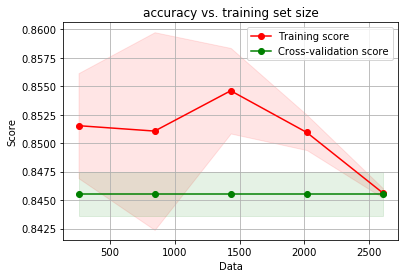

In [60]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", msg_train, label_train, cv=5)

## SVM

In [61]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer='char')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),  # <== change here
])

# pipeline parameters to automatically explore and tune
param_svm = [
  {'classifier__C': [1], 'classifier__kernel': ['linear']},
  {'classifier__C': [1], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,  # pipeline from above
    param_grid=param_svm,  # parameters to tune via cross validation
    refit=True,  # fit using all data, on the best detected classifier
    n_jobs=-1,  # number of cores to use for parallelization; -1 for "all cores"
    scoring='accuracy',  # what score are we optimizing?
    cv=StratifiedKFold(label_train, n_folds=5),  # what type of cross validation to use
)

In [62]:
%time svm_detector = grid_svm.fit(msg_train, label_train)
svm_detector.grid_scores_

Wall time: 6.92 s


[mean: 0.84828, std: 0.00049, params: {'classifier__C': 1, 'classifier__kernel': 'linear'},
 mean: 0.84828, std: 0.00049, params: {'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'},
 mean: 0.84828, std: 0.00049, params: {'classifier__C': 1, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}]

In [63]:
print(confusion_matrix(label_test, svm_detector.predict(msg_test)))
print(classification_report(label_test, svm_detector.predict(msg_test)))

[[  0   0  31   0   0]
 [  0   0  55   0   0]
 [  0   0 699   0   0]
 [  0   0  28   0   0]
 [  0   0   1   0   0]]
             precision    recall  f1-score   support

       bias       0.00      0.00      0.00        31
 conspiracy       0.00      0.00      0.00        55
       fake       0.86      1.00      0.92       699
       hate       0.00      0.00      0.00        28
     satire       0.00      0.00      0.00         1

avg / total       0.74      0.86      0.79       814



C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
svm_detector.predict(["Trump and Brexit: Directed History Proceeds"])[0]

'fake'

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

## Count Vectorizer and TRAINING AND TESTING DATA

In [66]:
cv=CountVectorizer()

In [67]:
new_df1=adv[['title','author','language','country','domain_rank','site_url','spam_score']]

In [68]:
new_df2=adv[['type']]

In [69]:
train_data=new_df1.iloc[1:3000,:]

In [70]:
test_data=new_df1.iloc[3000:1,:]

In [71]:
train_label=new_df2.iloc[1:3000,:]

In [72]:
test_label=new_df1.iloc[3000:1,]

In [73]:
train_vectors=cv.fit_transform(train_data)

In [74]:
test_vectors=cv.fit_transform(test_data)

In [75]:
cv.get_feature_names()

['author',
 'country',
 'domain_rank',
 'language',
 'site_url',
 'spam_score',
 'title']

In [76]:
adv.groupby('type').describe()

length
type                         
bias       count   190.000000
           mean     78.231579
           std      24.594899
           min      22.000000
           25%      67.000000
           50%      78.000000
           75%      84.750000
           max     223.000000
conspiracy count   260.000000
           mean     66.053846
           std      23.873480
           min      15.000000
           25%      50.000000
           50%      64.000000
           75%      78.000000
           max     206.000000
fake       count  3461.000000
           mean     69.049119
           std      26.794269
           min       1.000000
           25%      51.000000
           50%      69.000000
           75%      84.000000
           max     276.000000
hate       count   153.000000
           mean     52.816993
           std      20.873818
           min      15.000000
           25%      37.000000
           50%      52.000000
           75%      65.000000
           max     107.000000
satire     count     6.000000
           mean     52.000000
           std       3.162278
           min      48.000000
           25%      50.250000
           50%      51.500000
           75%      53.500000
           max      57.000000

In [77]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [78]:
adv['type_num']=adv.type.map({'fake':0,'conspiracy':1,'satire':2, 'bias':3,'hate':4})

In [79]:
adv

,author,title,language,site_url,country,domain_rank,spam_score,type,length,type_num
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,english,100percentfedup.com,US,25689,0,bias,53,3
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,english,100percentfedup.com,US,25689,0,bias,59,3
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,english,100percentfedup.com,US,25689,0,bias,68,3
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,100percentfedup.com,US,25689,0.068,bias,125,3
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,100percentfedup.com,US,25689,0.865,bias,101,3
5,Barracuda Brigade,Hillary Goes Afakeolutely Berserk On Protester...,english,100percentfedup.com,US,25689,0,bias,64,3
6,Fed Up,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,100percentfedup.com,US,25689,0.701,bias,223,3
7,Fed Up,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,english,100percentfedup.com,US,25689,0.188,bias,173,3
8,Fed Up,BREAKING: CLINTON CLEARED...Was This A Coordin...,english,100percentfedup.com,US,25689,0.144,bias,118,3
9,Fed Up,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",english,100percentfedup.com,US,25689,0.995,bias,143,3


In [80]:
X=adv.title
y=adv.type_num

In [81]:
print(X.shape)
print(y.shape)

(4070,)
(4070,)


In [82]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=4)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3052,)
(1018,)
(3052,)
(1018,)


In [84]:
vect = CountVectorizer()

In [85]:
from textblob import TextBlob

In [86]:
def split_into_tokens(title):
    message = unicode(title, 'utf8')  # convert bytes into proper unicode
    return TextBlob(title).words

In [87]:
TextBlob('title').tags

[('title', 'NN')]

In [88]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [89]:
X_train_dtm=vect.fit_transform(X_train)

In [90]:
X_train_dtm

<3052x7571 sparse matrix of type '<class 'numpy.int64'>'
	with 32440 stored elements in Compressed Sparse Row format>

In [91]:
X_test_dtm=vect.transform(X_test)
X_test_dtm

<1018x7571 sparse matrix of type '<class 'numpy.int64'>'
	with 9096 stored elements in Compressed Sparse Row format>

## K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn=KNeighborsClassifier(n_neighbors=15)

In [94]:
knn.fit(X_train_dtm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [95]:
y_pred_class=knn.predict(X_test_dtm)

In [96]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
print("Test set predictions:\n {}".format(y_pred_class))

Test set predictions:
 [0 0 0 ..., 0 0 0]


In [101]:
knn.score(X_test_dtm, y_test)

0.85068762278978394

In [102]:
%time knn.fit(X_train_dtm, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [106]:
from sklearn import metrics

In [107]:
metrics.accuracy_score(y_test,y_pred_class)

0.85068762278978394

In [108]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[866,   0,   0,   0,   0],
       [ 73,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0],
       [ 41,   0,   0,   0,   0],
       [ 37,   0,   0,   0,   0]])

In [109]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       866
          1       0.00      0.00      0.00        73
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00        41
          4       0.00      0.00      0.00        37

avg / total       0.72      0.85      0.78      1018



C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=15),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [111]:
scores

array([ 0.84690554,  0.84690554,  0.84690554,  0.84690554,  0.84690554,
        0.84918033,  0.85197368,  0.85478548,  0.85478548,  0.85761589])

In [112]:
scores.mean()

0.85028685505112411

## Naive Bayes

In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
nb=MultinomialNB()

In [115]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 4.52 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [116]:
y_pred_class=nb.predict(X_test_dtm)

In [117]:
from sklearn import metrics

In [118]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[860,   4,   0,   2,   0],
       [ 69,   4,   0,   0,   0],
       [  1,   0,   0,   0,   0],
       [ 40,   0,   0,   1,   0],
       [ 36,   0,   0,   0,   1]])

In [119]:
X_test[4600]

'Britain Should Embrace Unilateral Free Trade Right Now'

In [120]:
nb.predict_proba(X_test_dtm)[:,1]

array([ 0.00057411,  0.00133831,  0.00332323, ...,  0.00012103,
        0.00011903,  0.00042418])

In [121]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]

In [122]:
y_pred_prob

array([ 0.00057411,  0.00133831,  0.00332323, ...,  0.00012103,
        0.00011903,  0.00042418])

In [123]:
nb.score(X_train_dtm, y_train)

0.87975098296199217

In [124]:
metrics.accuracy_score(y_test, y_pred_class)

0.85068762278978394

In [125]:
print(metrics.classification_report(y_pred_class, y_test))

             precision    recall  f1-score   support

          0       0.99      0.85      0.92      1006
          1       0.05      0.50      0.10         8
          2       0.00      0.00      0.00         0
          3       0.02      0.33      0.05         3
          4       0.03      1.00      0.05         1

avg / total       0.98      0.85      0.91      1018



C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [126]:
scores = cross_val_score(MultinomialNB(),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [127]:
scores

array([ 0.78827362,  0.7752443 ,  0.79478827,  0.79153094,  0.79153094,
        0.79672131,  0.80592105,  0.8019802 ,  0.8019802 ,  0.79139073])

In [128]:
scores.mean()

0.793936156679931

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [130]:
%time logreg.fit(X_train_dtm, y_train)

Wall time: 115 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
logreg.score(X_train_dtm, y_train)

0.93905635648754915

In [132]:
y.mean()

0.3572481572481572

In [133]:
y_pred_class=logreg.predict(X_test_dtm)

In [134]:
y_pred_prob=logreg.predict_proba(X_test_dtm)
y_pred_prob

array([[ 0.91838892,  0.04367834,  0.00343428,  0.02532622,  0.00917224],
       [ 0.93634729,  0.03279982,  0.00322641,  0.01910671,  0.00851977],
       [ 0.87716305,  0.04838244,  0.00263991,  0.0129905 ,  0.0588241 ],
       ..., 
       [ 0.79351696,  0.05337291,  0.00216326,  0.02344637,  0.1275005 ],
       [ 0.5119868 ,  0.06914357,  0.00377312,  0.06241625,  0.35268026],
       [ 0.94717262,  0.02185991,  0.00105025,  0.0080039 ,  0.02191332]])

In [135]:
metrics.accuracy_score(y_test, y_pred_class)

0.85363457760314343

In [136]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92       866
          1       0.43      0.04      0.07        73
          2       0.00      0.00      0.00         1
          3       0.80      0.10      0.17        41
          4       0.67      0.05      0.10        37

avg / total       0.82      0.85      0.80      1018



C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
scores = cross_val_score(LogisticRegression(),  # steps to convert raw emails into models
                         X_train_dtm,  # training data
                         y_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )

C:\Users\navkiran\anaconda3 4.3.1\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [138]:
scores

array([ 0.8534202 ,  0.84039088,  0.8534202 ,  0.85016287,  0.85667752,
        0.84590164,  0.86184211,  0.85478548,  0.86468647,  0.85430464])

In [139]:
scores.mean()

0.85355919888015153

## RESULTS AND ANALYSIS

In [140]:
names=['author','title','language', 'country', 'site_url', 'domain_rank', 'spam_score', 'type']

In [141]:
seed=7

In [142]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))

In [143]:
results=[]

In [144]:
names=[]

In [145]:
scoring='accuracy'

In [146]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    scores = model_selection.cross_val_score(model, X_test_dtm, y_pred_class, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)

LR: 0.985280 (0.010273)
KNN: 0.985280 (0.010273)
NB: 0.985280 (0.010273)
SVM: 0.985280 (0.010273)


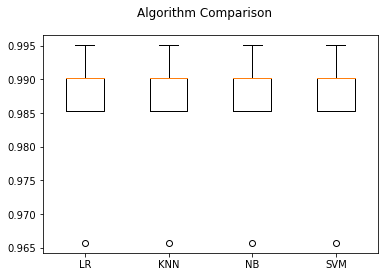

In [147]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

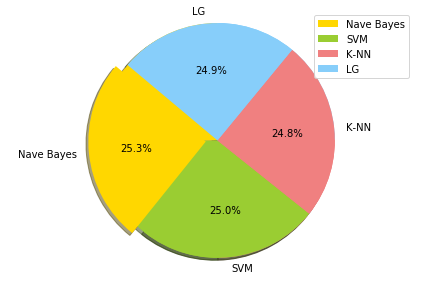

In [151]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Nave Bayes', 'SVM', 'K-NN', 'LG'
sizes = [87, 86, 85, 85.33]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

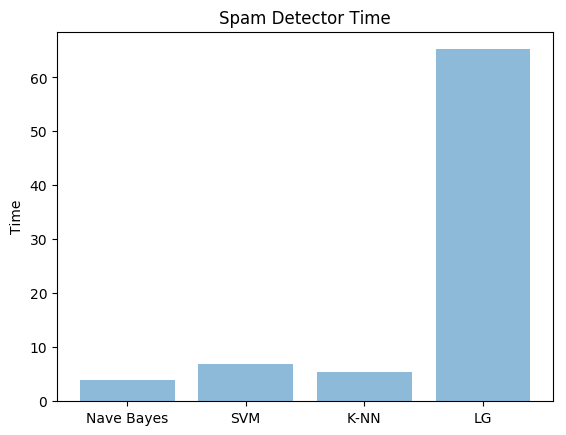

In [152]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Nave Bayes', 'SVM', 'K-NN', 'LG')
y_pos = np.arange(len(objects))
performance = [4.01,6.88,5.5,65.2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Spam Detector Time')
 
plt.show()